Original Time Series Data:
        Date  Value
0 2024-01-01   99.0
1 2024-01-02  430.0
2 2024-01-03    NaN
3 2024-01-04  139.0
4 2024-01-05    NaN
5 2024-01-06   89.0
6 2024-01-07  141.0
7 2024-01-08  106.0
8 2024-01-09   65.0
9 2024-01-10   90.0

Cleaned and Processed Time Series Data:
        Date     Value  Smoothed_Value
0 2024-01-01  0.425665        0.425665
1 2024-01-02  0.719875        0.572770
2 2024-01-03  1.000000        0.715180
3 2024-01-04  0.926448        0.882107
4 2024-01-05  1.000000        0.975483
5 2024-01-06  0.300469        0.742306
6 2024-01-07  0.951487        0.750652
7 2024-01-08  0.513302        0.588419
8 2024-01-09  0.000000        0.488263
9 2024-01-10  0.312989        0.275430


<ipython-input-1-6b712a710aec>:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Value'].fillna(df['Value'].mean(), inplace=True)


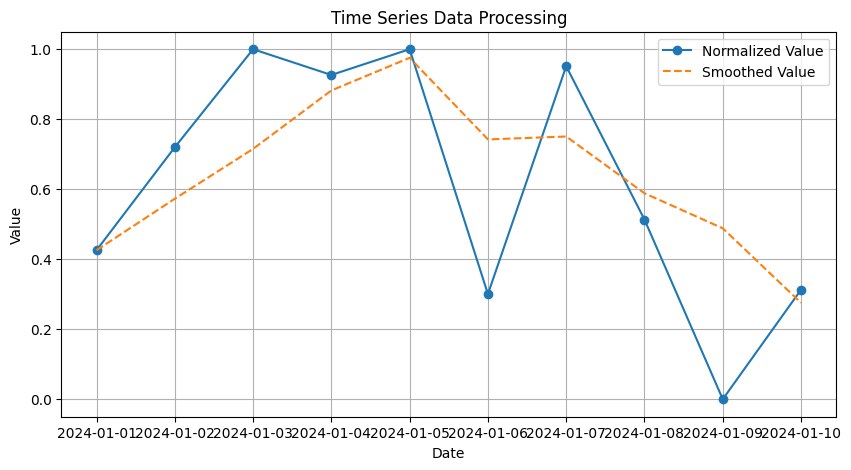

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate random time series data (10-20 samples)
n_samples = np.random.randint(10, 21)
dates = pd.date_range(start='2024-01-01', periods=n_samples, freq='D')
data = np.random.randint(50, 150, size=n_samples).astype(float)

# Introduce some missing values and outliers
indices_with_nan = np.random.choice(n_samples, size=2, replace=False)
data[indices_with_nan] = np.nan  # Missing values

data[np.random.randint(0, n_samples)] *= 5  # Outlier

df = pd.DataFrame({'Date': dates, 'Value': data})
print("Original Time Series Data:")
print(df)

# Handling Missing Values (Fill with mean value)
df['Value'].fillna(df['Value'].mean(), inplace=True)

# Handling Outliers (Capping at 99th percentile)
upper_limit = df['Value'].quantile(0.99)
df['Value'] = np.where(df['Value'] > upper_limit, df['Value'].median(), df['Value'])

# Normalization (Min-Max Scaling)
df['Value'] = (df['Value'] - df['Value'].min()) / (df['Value'].max() - df['Value'].min())

# Moving Average Smoothing (Window = 3)
df['Smoothed_Value'] = df['Value'].rolling(window=3, min_periods=1).mean()

print("\nCleaned and Processed Time Series Data:")
print(df)

# Plot the time series data
plt.figure(figsize=(10,5))
plt.plot(df['Date'], df['Value'], label='Normalized Value', marker='o')
plt.plot(df['Date'], df['Smoothed_Value'], label='Smoothed Value', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series Data Processing')
plt.legend()
plt.grid()
plt.show()
